<a href="https://colab.research.google.com/github/AnastasiiaVladimirovna/transcriptomics_homeworks/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Номер 1

In [ ]:
!wget https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.0/sratoolkit.3.0.0-ubuntu64.tar.gz
!tar -xvzf sratoolkit.3.0.0-ubuntu64.tar.gz
!sratoolkit.3.0.0-ubuntu64/bin/vdb-config -i
!curl -fsSL https://get.nextflow.io | bash

!git clone https://github.com/pachterlab/kallisto.git
!apt-get install autoconf
!cd kallisto && mkdir build && cd build && cmake .. && make

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_rna.fna.gz

In [ ]:
!./kallisto/build/src/kallisto index -i transcriptome.idx GCF_000001405.40_GRCh38.p14_rna.fna.gz


[build] loading fasta file GCF_000001405.40_GRCh38.p14_rna.fna.gz
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 5158 target sequences
[build] warning: replaced 15 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... tcmalloc: large alloc 1610612736 bytes == 0x55bbdc788000 @  0x7f0c4490d887 0x55bb4965982d 0x55bb4966140b 0x55bb49623f40 0x7f0c4378dc87 0x55bb4962c10a
tcmalloc: large alloc 3221225472 bytes == 0x55bc3c788000 @  0x7f0c4490d887 0x55bb4965982d 0x55bb4966140b 0x55bb49623f40 0x7f0c4378dc87 0x55bb4962c10a
tcmalloc: large alloc 6442450944 bytes == 0x55bcfd068000 @  0x7f0c4490d887 0x55bb4965982d 0x55bb4966140b 0x55bb49623f40 0x7f0c4378dc87 0x55bb4962c10a
done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 991009 contigs and contains 142754887 k-mers 



Сделаем такой файл

```
params.results_dir = "results/"
SRA_list = params.SRA.split(",")
params.transcriptome = "/content/transcriptome.idx"

log.info ""
log.info "  Q U A L I T Y   C O N T R O L  "
log.info "================================="
log.info "SRA number         : ${SRA_list}"
log.info "Results location   : ${params.results_dir}"

process DownloadFastQ {
  publishDir "${params.results_dir}"

  input:
    val sra

  output:
    path "${sra}/*"

  script:
    """
    /content/sratoolkit.3.0.0-ubuntu64/bin/fasterq-dump ${sra} -O ${sra}/
    """
}

process Kalisto {
  publishDir "${params.results_dir}"

  input:
    path x

  output:
    path "res/*"

  script:
    """
    mkdir qc
    /content/kallisto/build/src/kallisto quant -i ${params.transcriptome} -o res $x
    """
}


workflow {
  data = Channel.of( SRA_list )
  DownloadFastQ(data)
  Kalisto( DownloadFastQ.out )
}
```

Запустим

In [ ]:
!./nextflow run pipeline.nf --SRA SRR6410607

N E X T F L O W  ~  version 22.10.4
Launching `pipeline.nf` [focused_dalembert] DSL2 - revision: a8e7fc1a1d

  Q U A L I T Y   C O N T R O L  
SRA number         : [SRR6410607]
Results location   : results/
[-        ] process > DownloadFastQ -
[-        ] process > Kalisto       -

[-        ] process > DownloadFastQ [  0%] 0 of 1
[-        ] process > Kalisto       -

executor >  local (1)
[07/684752] process > DownloadFastQ (1) [  0%] 0 of 1
[-        ] process > Kalisto           -

executor >  local (1)
[07/684752] process > DownloadFastQ (1) [100%] 1 of 1 ✔
[-        ] process > Kalisto           -

executor >  local (2)
[07/684752] process > DownloadFastQ (1) [100%] 1 of 1 ✔
[a7/015c3d] process > Kalisto (1)       [  0%] 0 of 1

executor >  local (2)
[07/684752] process > DownloadFastQ (1) [100%] 1 of 1 ✔
[a7/015c3d] process > Kalisto (1)       [100%] 1 of 1 ✔
Completed at: 17-Dec-2022 19:41:37
Duration    : 25m 29s
CPU hours   : 0.4
Succeeded   : 2




Посмотрим что вообще получилось

In [ ]:
results = pd.read_csv("results/res/abundance.tsv", sep="\t", index_col=0)
results['tpm'].head

<bound method NDFrame.head of target_id
NM_000014.6    178.429000
NM_000015.3     69.629000
NM_000016.6    142.044000
NM_000017.4    132.320000
NM_000018.4    339.944000
                  ...    
XR_953251.3      0.000000
XR_953252.3      0.029351
XR_953253.3      0.140426
XR_953307.2      0.000000
XR_953308.2      0.000000
Name: tpm, Length: 177816, dtype: float64>

Похоже на то, что нужно, что радует)

# Номер 2

In [ ]:
!gdown --id 17mf6RUEFOJ19t2zNuFlswSUs7MODwLlk

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17mf6RUEFOJ19t2zNuFlswSUs7MODwLlk
To: /content/EM_dataset.csv
100% 12.6k/12.6k [00:00<00:00, 7.77MB/s]


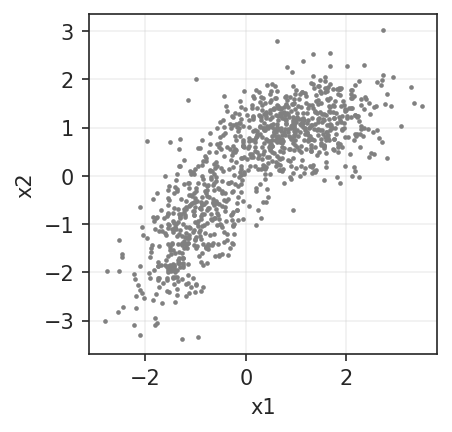

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("ticks")
df = pd.read_csv("EM_dataset.csv")
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=5, color="grey", linewidth=0, ax=ax)
ax.grid(alpha=0.3)

In [ ]:
import numpy as np

def get_random_psd(n=2):
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())

phi_1 = np.random.uniform(0, 1)
phi_2 = np.random.uniform(0, 1-phi_1)

params = {
    "phi_1" : phi_1, # Доля точек, принадлежащих к кластеру 1
    "phi_2" : phi_2, # Доля точек, принадлежащих к кластеру 2

    "mu1" : np.random.normal(0, 1, size=2), # Центр распределения 1
    "mu2" : np.random.normal(0, 1, size=2), # Центр распределения 2
    "mu3" : np.random.normal(0, 1, size=2), # Центр распределения 3
    
    "sigma1": get_random_psd(), # У 2d Гауссианы таким образом задаётся дисперсия
    "sigma2" : get_random_psd(), # У 2d Гауссианы таким образом задаётся дисперсия
    "sigma3" : get_random_psd() # У 2d Гауссианы таким образом задаётся дисперсия
}

for param in params:
  print(f"{param}:")
  print(params[param], "\n")


phi_1:
0.44908086562239535 

phi_2:
0.42991626080438994 

mu1:
[1.59892786 0.93434343] 

mu2:
[-0.99612257 -2.24828449] 

mu3:
[ 0.2315119  -0.18943191] 

sigma1:
[[0.05548799 0.06334688]
 [0.06334688 1.97449609]] 

sigma2:
[[ 1.77225549 -1.56264221]
 [-1.56264221  2.26308003]] 

sigma3:
[[ 0.07559496 -0.2831638 ]
 [-0.2831638   2.13202721]] 



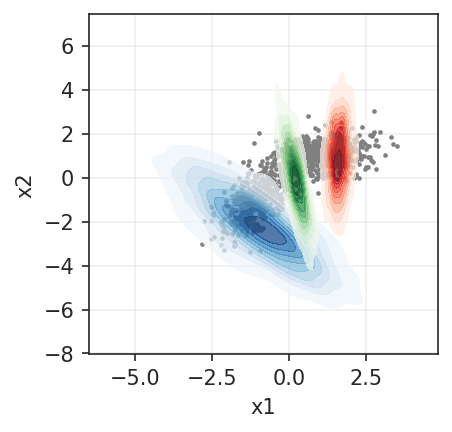

In [ ]:
import scipy.stats as stats

hist1 = stats.multivariate_normal(params["mu1"], params["sigma1"]).rvs(size=1000)
hist2 = stats.multivariate_normal(params["mu2"], params["sigma2"]).rvs(size=1000)
hist3 = stats.multivariate_normal(params["mu3"], params["sigma3"]).rvs(size=1000)

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=5, linewidth=0, ax=ax, color="grey")
sns.kdeplot(x=hist1[:, 0], y=hist1[:, 1], ax=ax, cmap="Reds", fill=True, alpha=0.7)
sns.kdeplot(x=hist2[:, 0], y=hist2[:, 1], ax=ax, cmap="Blues", fill=True, alpha=0.7)
sns.kdeplot(x=hist3[:, 0], y=hist3[:, 1], ax=ax, cmap="Greens", fill=True, alpha=0.7)
ax.grid(alpha=0.3)
#Pastel1

In [ ]:
from scipy.special import logsumexp

X = df.values

def E_step(X, params, draw=False):
  LogLikelihood = A = np.log([
      stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(X), 
      stats.multivariate_normal(params["mu2"], params["sigma2"]).pdf(X),
      stats.multivariate_normal(params["mu3"], params["sigma3"]).pdf(X)
  ])
  logPrior = B = np.log([params["phi_1"], params["phi_2"], 1 - params["phi_1"] - params["phi_2"]])
  logPosterior = D = logPrior + LogLikelihood.T
  RealSoftMax = C = logsumexp(logPosterior, axis=1)
  probabilities = np.exp(logPosterior - np.array([RealSoftMax]).T)

  if draw:
    hist1 = stats.multivariate_normal(params["mu1"], params["sigma1"]).rvs(size=1000)
    hist2 = stats.multivariate_normal(params["mu2"], params["sigma2"]).rvs(size=1000)
    hist3 = stats.multivariate_normal(params["mu3"], params["sigma3"]).rvs(size=1000)

    fig, axes = plt.subplots(figsize=(8, 3), dpi=150, ncols=4)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=probabilities[:, 0], linewidth=0,
                    palette="coolwarm", ax=axes[1], s=2, alpha=1)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=probabilities[:, 1], linewidth=0,
                    palette="coolwarm", ax=axes[2], s=2, alpha=1)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=probabilities[:, 2], linewidth=0,
                    palette="coolwarm", ax=axes[3], s=2, alpha=1)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], linewidth=0, ax=axes[0], s=3, alpha=1, color="grey")
    sns.kdeplot(x=hist1[:, 0], y=hist1[:, 1], ax=axes[0], cmap="Reds", fill=True, alpha=0.5)
    sns.kdeplot(x=hist2[:, 0], y=hist2[:, 1], ax=axes[0], cmap="Blues", fill=True, alpha=0.5)
    sns.kdeplot(x=hist3[:, 0], y=hist3[:, 1], ax=axes[0], cmap="Greens", fill=True, alpha=0.5)
    axes[0].grid(alpha=0.3)
    axes[1].grid(alpha=0.3)
    axes[2].grid(alpha=0.3)
    axes[3].grid(alpha=0.3)
    axes[1].legend().remove()
    axes[2].legend().remove()
    axes[3].legend().remove()
    plt.show()

  return RealSoftMax, probabilities

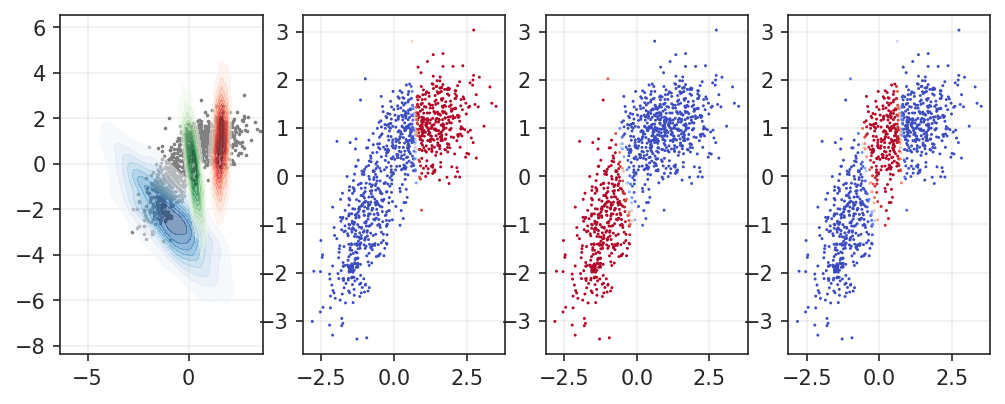

In [ ]:
total_prob, probabilities = E_step(X, params, draw=True)
# На последних трех графиках видим принадлежность точки к каждому из трех распределений.

In [ ]:
def M_step(X, params, probabilities):
  prob_1 = probabilities[:, 0]
  prob_2 = probabilities[:, 1]
  prob_3 = probabilities[:, 2]

  # Вычисление новых значений
  # Пропорция = prior
  phi_1 = prob_1.sum() / len(X)
  phi_2 = prob_2.sum() / len(X)

  # Среднее
  mu1 = prob_1.dot(X) / np.sum(prob_1)
  mu2 = prob_2.dot(X) / np.sum(prob_2)
  mu3 = prob_3.dot(X) / np.sum(prob_3)

  # Дисперсия
  sigma1 = (X - mu1).T.dot((X - mu1) * np.array([prob_1]).T) / np.sum(prob_1)
  sigma2 = (X - mu2).T.dot((X - mu2) * np.array([prob_2]).T) / np.sum(prob_2)
  sigma3 = (X - mu3).T.dot((X - mu3) * np.array([prob_3]).T) / np.sum(prob_3)
  
  return {
      "phi_1" : phi_1, "phi_2" : phi_2,
      "mu1" : mu1, "mu2" : mu2, "mu3" : mu3,
      "sigma1": sigma1, "sigma2": sigma2, "sigma3": sigma3
  }

In [ ]:
def run_EM(X, params, draw=False):
    import imageio
    avg_allprob = []

    while True:
        allprob, probabilities = E_step(X, params, draw=draw)
        avg_allprob.append(np.mean(allprob))
        if len(avg_allprob) > 2 and abs(avg_allprob[-1] - avg_allprob[-2]) < 0.001:
            break
        params = M_step(X, params, probabilities)
        
    loglikelihood, probabilities = E_step(X, params)
    forecasts = np.argmax(probabilities, axis=1)
    return forecasts, probabilities, avg_allprob

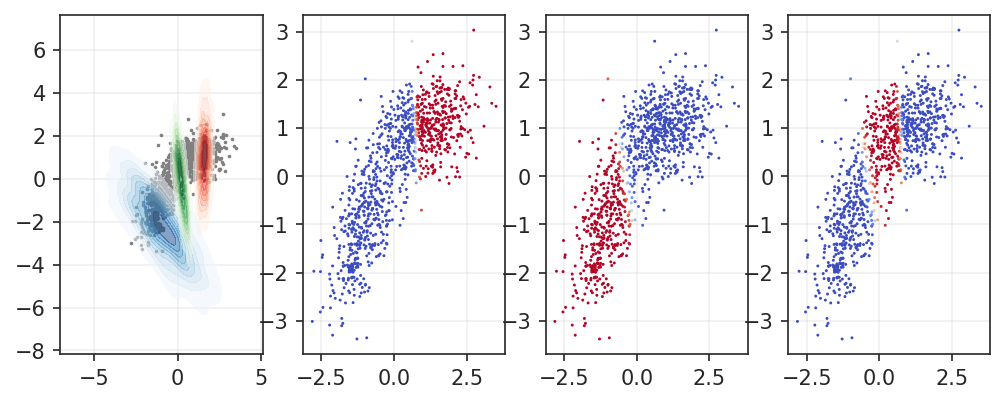

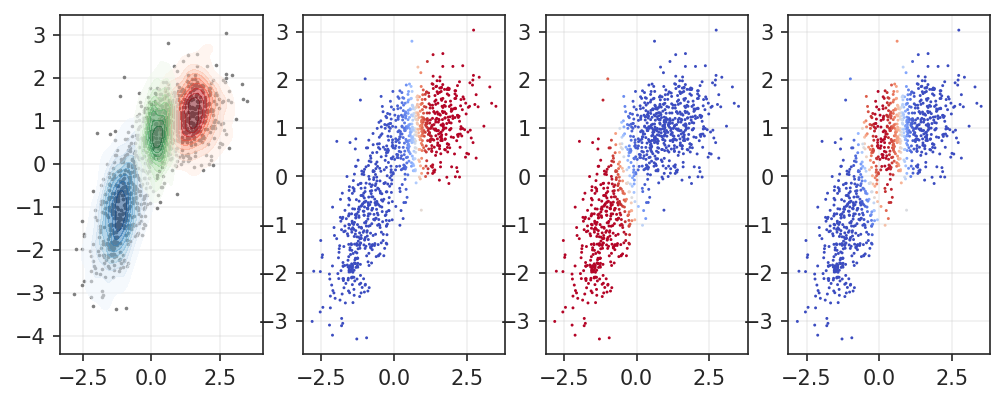

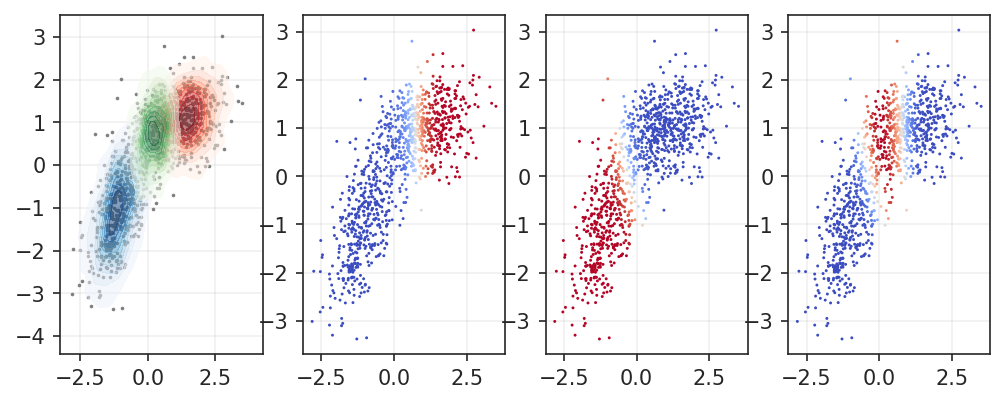

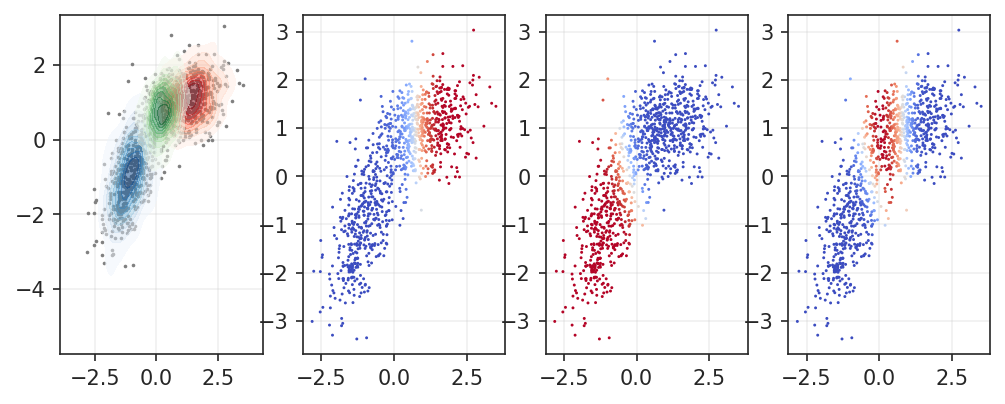

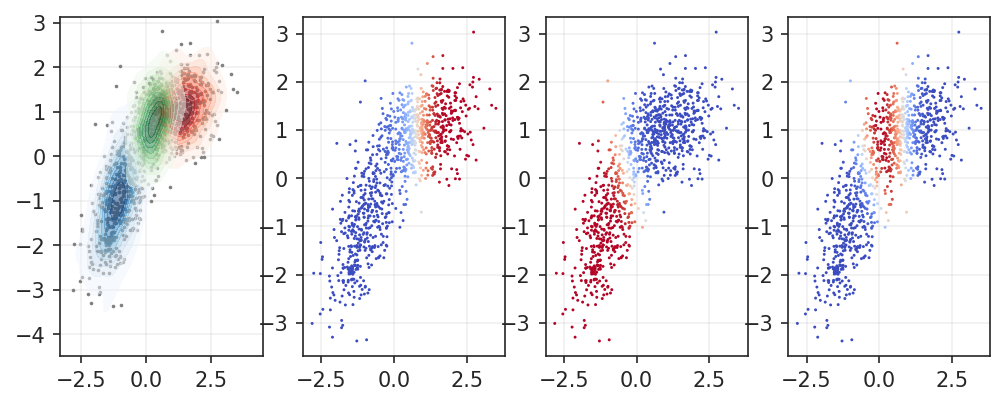

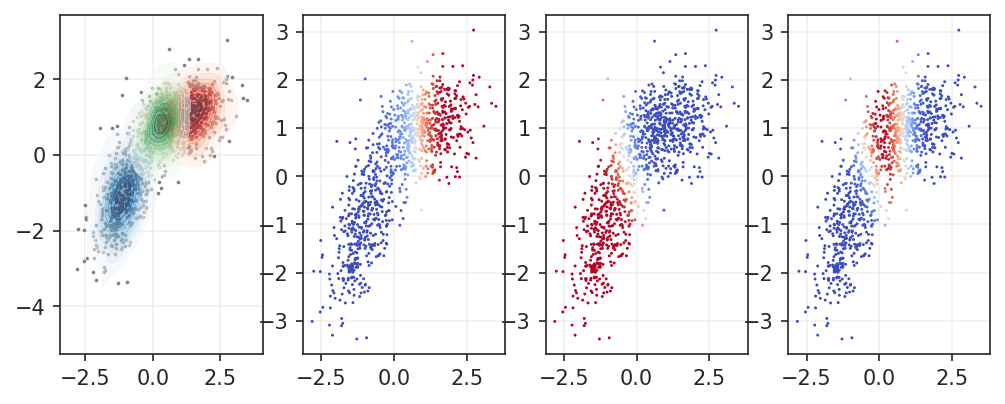

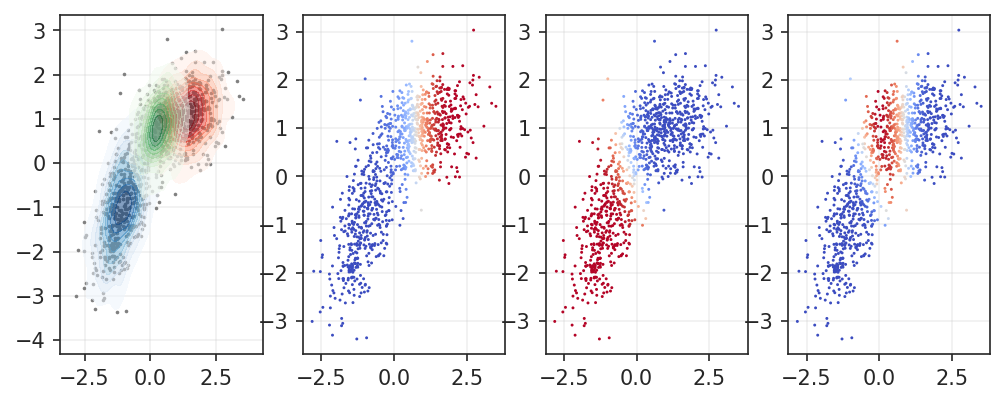

In [ ]:
pred, prob, allprob = run_EM(X, params, draw=True)

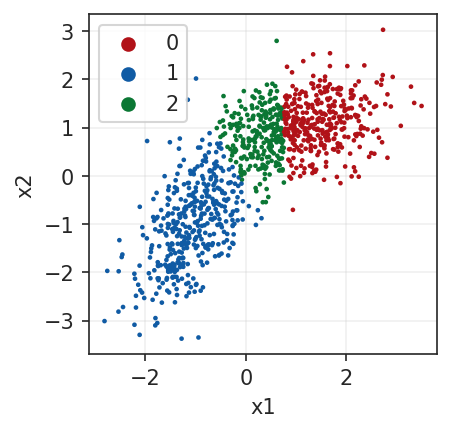

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=5, linewidth=0, ax=ax, hue=pred,
                palette={0: sns.color_palette("Reds", n_colors=5)[-1],
                         1: sns.color_palette("Blues", n_colors=5)[-1],
                         2: sns.color_palette("Greens", n_colors=5)[-1]})
ax.grid(alpha=0.3)